# Post-IMSC : normalized slopes figure

In [2]:
# necessary: netcdf4-python, regionmask, (xarray, geopandas), cartopy, openpyxl, statsmodels

import numpy as np
import pandas as pd
import os, glob, re 
import math
import xarray as xr
import geopandas as gpd
import regionmask as regionmask
import dask
import matplotlib.pyplot as plt
import netCDF4

%matplotlib inline

#plotting
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# import my variables settings functions from other scripts
from settings_ana import *

# import fxns 
from functions_ana import *
from utils_ana import *
from plotscript import *

# import other packages/modules 

sys.path.append('../population/') # TODO: update to new dem4cli ! w new SSP2 pop data! 
from population_demographics_climate import * # move / rename this when good ! --> change to import demographics4climate as d4c


# sys.path.append('../../../demographics4climate/')
# from population_demographics import * 



In [3]:
from dask.distributed import Client 
client = Client()
client

/apps/brussel/RL8/zen4/software/dask/2023.9.2-foss-2023a/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42993 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42993/status,
Dashboard: http://127.0.0.1:42993/status,Workers: 2
Total threads: 2,Total memory: 60.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46809,Workers: 2
Dashboard: http://127.0.0.1:42993/status,Total threads: 2
Started: Just now,Total memory: 60.00 GiB
Comm: tcp://127.0.0.1:37367,Total threads: 1
Dashboard: http://127.0.0.1:45431/status,Memory: 30.00 GiB
Nanny: tcp://127.0.0.1:40441,


In [4]:
figdir = os.path.join(figdirs, 'fig_aug24')


# Open data : GCM empirical percentiles nAHD

In [139]:
dirname='output_empirical'
models='ISIMIP3b'

year=2023

da_nAHD_WBGT28_models = open_all_nAHD(GCMs,  metric='WBGT28', outdirname=dirname, year_pres=year) # see here i coded what models it is in the fxn 
da_nAHD_WBGT30_models = open_all_nAHD(GCMs,  metric='WBGT30', outdirname=dirname, year_pres=year)
da_nAHD_WBGT33_models = open_all_nAHD(GCMs,  metric='WBGT33', outdirname=dirname, year_pres=year)

da_nAHD_WBGT90_models = open_all_nAHD(GCMs,  metric='WBGT90', outdirname=dirname, year_pres=year) # dont have these for 2022
da_nAHD_WBGT95_models = open_all_nAHD(GCMs,  metric='WBGT95', outdirname=dirname, year_pres=year) 
da_nAHD_WBGT99_models = open_all_nAHD(GCMs,  metric='WBGT99', outdirname=dirname, year_pres=year) 

da_nAHD_TX90_models = open_all_nAHD(GCMs,  metric='TX90', outdirname=dirname, year_pres=year) 
da_nAHD_TX95_models = open_all_nAHD(GCMs,  metric='TX95', outdirname=dirname, year_pres=year)  
da_nAHD_TX99_models = open_all_nAHD(GCMs,  metric='TX99', outdirname=dirname, year_pres=year) 

# Demographics data

In [6]:
d_countries = preprocess_all_country_population_data()
gs_population_global = get_gridscale_population_global( 
    d_countries,
    startyear=2023,
    endyear=None,
    save=False # change where this gets saved !!!! now its in package folder
)

# open saved file instead of re-running every time (update to new data though!)

interpolating cohort sizes per country
after interpolation and mean-preserving correction there are some neg numbers in 10, Azerbaijan, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 98, Libya, setting them to zero
after interpolation and mean-preserving correction there are some neg numbers in 136, Papua New Guinea, setting them to zero
Aruba small, population not calculated
Antigua and Barbuda small, population not calculated
Bahrain small, population not calculated
Barbados small, population not calculated
Federated States of Micronesia small, population not calculated
Grenada small, population not calculated
Guam small, population not calculated
Saint Lucia small, population not calculated
Macao small, population not calculated
Maldives small, population not calculated
Malta small, population not calculated
Singapore small, population not calculated
Tonga small, population not calculated
calculating gridscale population per cou

## 1 Models

In [10]:
da_nAHD = da_nAHD_WBGT28_models

da_n_people_ndays_WBGT28_models, da_prop_people_ndays_WBGT28_models = calc_number_proportion_people_atleastxdays_10yr(gs_population_global, 
                                                                                          GCMs, 
                                                                                          da_nAHD,  
                                                                                          x_hot_days = [1,5,10,20,50])



da_nAHD_percapita_peopledays_10y_WBGT28_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

In [14]:
da_nAHD = da_nAHD_WBGT30_models

da_n_people_ndays_WBGT30_models, da_prop_people_ndays_WBGT30_models = calc_number_proportion_people_atleastxdays_10yr(gs_population_global, 
                                                                                          GCMs, 
                                                                                          da_nAHD,  
                                                                                          x_hot_days = [1,5,10,20,50])



da_nAHD_percapita_peopledays_10y_WBGT30_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD = da_nAHD_TX99_models

da_n_people_ndays_TX99_models, da_prop_people_ndays_TX99_models = calc_number_proportion_people_atleastxdays_10yr(gs_population_global, 
                                                                                          GCMs, 
                                                                                          da_nAHD,  
                                                                                          x_hot_days = [1,5,10,20,50])



da_nAHD_percapita_peopledays_10y_TX99_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

In [140]:
da_nAHD = da_nAHD_TX95_models

da_nAHD_percapita_peopledays_10y_TX95_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD = da_nAHD_TX90_models

da_nAHD_percapita_peopledays_10y_TX90_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD = da_nAHD_WBGT99_models

da_nAHD_percapita_peopledays_10y_WBGT99_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

da_nAHD = da_nAHD_WBGT95_models

da_nAHD_percapita_peopledays_10y_WBGT95_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )


da_nAHD = da_nAHD_WBGT90_models

da_nAHD_percapita_peopledays_10y_WBGT90_models = calc_percapita_hotdays_peopledays_1yr(gs_population_global, 
                                                                           GCMs, 
                                                                           da_nAHD,
                                                                           x_hot_days = [1, 5, 10, 20, 50], 
                                                                           ages_values=range(0,100),
                                                                           grouped = True,
                                                                           size_win = 10,
                                                                         mask_where_decr=False
                                                                           )

In [11]:
da_n_people_ndays_WBGT28_models

<xarray.DataArray 'number of people' (model: 6, age_ranges: 10, features: 5)>
array([[[1082517948.3659108, 1009560781.3452929, 954289404.5517281,
         852516152.701835, 505427660.76807415],
        [1056134330.0823636, 982694137.9545186, 927887981.9546268,
         823199841.3679687, 481107764.77670294],
        [974719537.5604405, 903847835.3936306, 850961042.4855392,
         749637244.6554769, 431579108.02546704],
        [949182376.1015979, 871791264.3034376, 814297106.8619041,
         694722855.997964, 373718930.22604287],
        [797035228.572214, 727068255.1246637, 675984916.908277,
         570518052.7531533, 303810811.79079396],
        [683404798.8770641, 615943743.9319644, 568279632.4673121,
         461727728.88854957, 230049566.39675036],
        [480463023.03053796, 427720140.8000228, 390860692.9637796,
         313695499.40711474, 152951308.74244592],
        [261618244.2344116, 228589142.6088648, 206631858.71609133,
         160172915.31055123, 73546014.54542667],
        [90775811.42483877, 77269194.7008246, 68580544.28473146,
         51757690.21579929, 23251969.06686055],
        [15259970.856877625, 12607770.029042091, 10974889.182012405,
         7922225.874726662, 3472379.952640235]],
...
       [[1087458239.6965556, 1006919041.7804489, 923443885.1587709,
         681877123.1797938, 325088551.146769],
        [1062742153.9130391, 980861954.5828471, 894000402.1831166,
         644208461.8671112, 294729496.1995187],
        [982080503.4512242, 902547818.6608009, 815931113.7451984,
         573579559.8703231, 249415471.70981815],
        [962571342.7412394, 876480935.0128236, 782649417.8243108,
         516463831.9081831, 209311466.35109282],
        [812098515.5991445, 733391443.5705689, 650003386.2015171,
         422493671.5721388, 167567846.98424268],
        [699319148.5573161, 626090322.2001547, 545745900.7140884,
         328920400.7743863, 123933473.38078485],
        [495033882.09651333, 436104493.0458228, 375792859.2527497,
         222736015.3507152, 80535454.95540933],
        [271282135.16304266, 234328238.60894698, 199137522.49483067,
         112156481.69395992, 38447245.909001976],
        [95466470.21409164, 79746417.53940257, 66563763.47766502,
         36616517.69622393, 11825701.013687856],
        [16107997.498999076, 13087521.546930846, 10754338.061813684,
         5762815.962757412, 1711003.1523630507]]], dtype=object)
Coordinates:
  * age_ranges  (age_ranges) int64 0 10 20 30 40 50 60 70 80 90
  * features    (features) object 'n_atleast_1' 'n_atleast_5' ... 'n_atleast_50'
  * model       (model) <U12 'CanESM5' 'CNRM-CM6-1' ... 'MIROC6' 'MRI-ESM2-0'

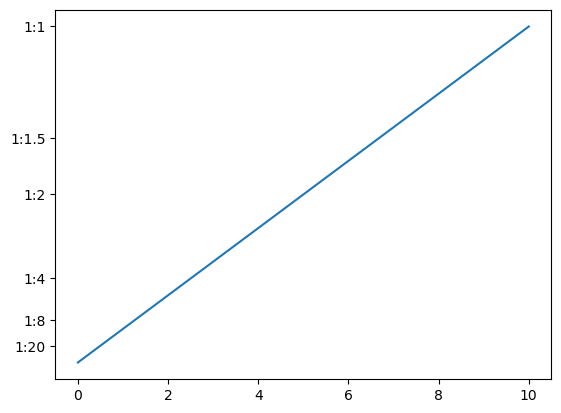

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Sample data
x = np.linspace(0, 10, 100)
y = x / 10  # Example data where y values are in the range [0, 1]

fig, ax = plt.subplots()

ax.plot(x, y)

# Define custom tick values
custom_ticks = [1/1, 1/1.5, 1/2,  1/4, 1/8, 1/20]

# Define a custom formatter function for the y-axis
def fraction_formatter(x, pos):
    # Convert decimal to fraction with numerator fixed at 1
    if x in custom_ticks:
        denominator = 1 / x
        if denominator.is_integer():
            return f'1:{int(round(denominator))}'
        else:
            return f'1:{denominator}'
    return f'{x:.2f}'  # fallback to decimal format if not a simple fraction

# Apply the formatter to the y-axis
formatter = FuncFormatter(fraction_formatter)
ax.yaxis.set_major_formatter(formatter)

# Set the y-axis ticks to the custom values
ax.set_yticks(custom_ticks)

plt.show()




<Axes: xlabel='age_ranges'>

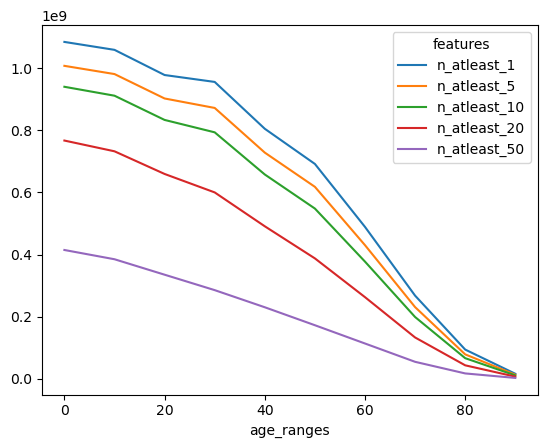

In [13]:
da=da_n_people_ndays_WBGT28
da.mean(dim='model').to_pandas().plot()

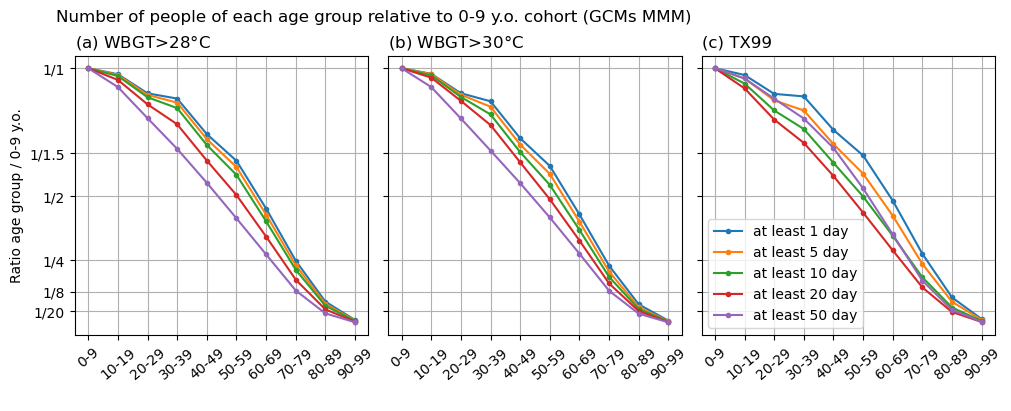

In [151]:
from matplotlib.ticker import FuncFormatter, MultipleLocator


# Define a custom formatter function for the y-axis
def fraction_formatter(x, pos):
    # Convert decimal to fraction with numerator fixed at 1
    if x in custom_ticks:
        denominator = 1 / x
        if denominator.is_integer():
            return f'1/{int(round(denominator))}'
        else:
            return f'1/{denominator}'
    return f'{x:.2f}'  # fallback to decimal format if not a simple fraction

formatter = FuncFormatter(fraction_formatter)

# set data

# set custom ticks
custom_ticks = [1/1,  1/1.5, 1/2,  1/4, 1/8, 1/20]
step_ages = 9
x_hot_days = [1,5,10,20,50]

fig, axes = plt.subplots(1,3,figsize=(10,4),sharey=True,layout='constrained')


ax=axes[0]
da=da_n_people_ndays_WBGT28_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(a) WBGT>28$\degree$C',loc='left')

# set custom yticks
ax.yaxis.set_major_formatter(formatter)
ax.set_yticks(custom_ticks)
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)
ax.set_ylabel('Ratio age group / 0-9 y.o.')        

ax=axes[1]
da=da_n_people_ndays_WBGT30_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(b) WBGT>30$\degree$C',loc='left')
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)

ax=axes[2]
da=da_n_people_ndays_TX99_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,marker='.')
ax.set_title('(c) TX99',loc='left')
ax.grid()
ax.legend(labels = [f'at least {x} day' for x in x_hot_days])
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)


fig.suptitle('Number of people of each age group relative to 0-9 y.o. cohort (GCMs MMM)',x=0.05,ha='left')
plt.minorticks_off()



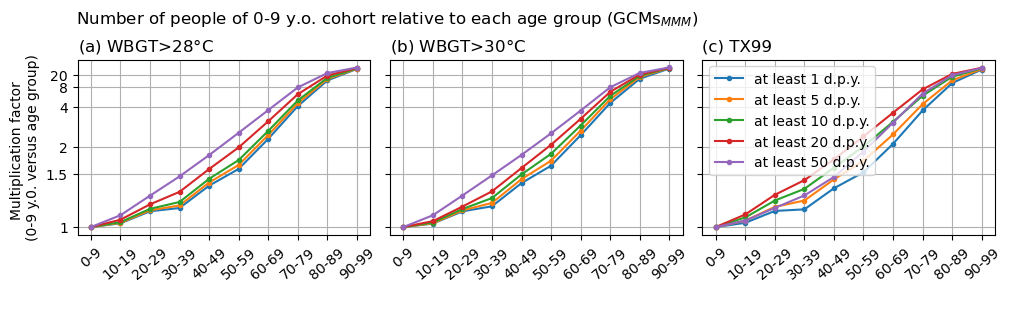

In [193]:
from matplotlib.ticker import FuncFormatter, MultipleLocator


# Define a custom formatter function for the y-axis
def fraction_formatter(x, pos):
    # Convert decimal to fraction with numerator fixed at 1
    if x in custom_ticks:
        denominator = 1 / x
        if denominator.is_integer():
            return f'{int(round(denominator))}'
        else:
            return f'{denominator}'
    return f'{x:.2f}'  # fallback to decimal format if not a simple fraction

formatter = FuncFormatter(fraction_formatter)

# set data

# set custom ticks
custom_ticks = [1/1,  1/1.5, 1/2,  1/4, 1/8, 1/20]
step_ages = 9
x_hot_days = [1,5,10,20,50]

fig, axes = plt.subplots(1,3,figsize=(10,3),sharey=True,layout='constrained',facecolor='none')
plt.gca().invert_yaxis()


ax=axes[0]
da=da_n_people_ndays_WBGT28_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(a) WBGT>28$\degree$C',loc='left')

# set custom yticks
ax.yaxis.set_major_formatter(formatter)
ax.set_yticks(custom_ticks)
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)
ax.set_ylabel('Multiplication factor \n(0-9 y.0. versus age group)')        

ax=axes[1]
da=da_n_people_ndays_WBGT30_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(b) WBGT>30$\degree$C',loc='left')
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)

ax=axes[2]
da=da_n_people_ndays_TX99_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,marker='.')
ax.set_title('(c) TX99',loc='left')
ax.grid()
ax.legend(labels = [f'at least {x} d.p.y.' for x in x_hot_days])
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)


fig.suptitle('Number of people of 0-9 y.o. cohort relative to each age group (GCMs$_{MMM}$)',x=0.07,ha='left')
plt.minorticks_off()

#plt.savefig(os.path.join(figdir,'slopes_models_npeople_flat.png'),dpi=300,bbox_inches='tight',transparent=False)

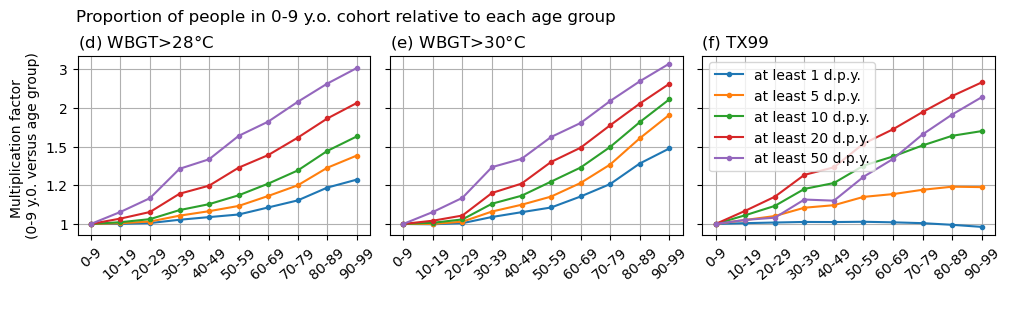

In [194]:

# set custom ticks
custom_ticks = [1/1,  1/1.2, 1/1.5, 1/2,  1/3,]
step_ages = 9
x_hot_days = [1,5,10,20,50]

fig, axes = plt.subplots(1,3,figsize=(10,3),sharey=True,layout='constrained',facecolor='none')
plt.gca().invert_yaxis()

ax=axes[0]
da=da_prop_people_ndays_WBGT28_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(d) WBGT>28$\degree$C',loc='left')

# set custom yticks
ax.yaxis.set_major_formatter(formatter)
ax.set_yticks(custom_ticks)
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)
ax.set_ylabel('Multiplication factor \n(0-9 y.0. versus age group)')        


ax=axes[1]
da=da_prop_people_ndays_WBGT30_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,legend=False,marker='.')
ax.set_title('(e) WBGT>30$\degree$C',loc='left')
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)

ax=axes[2]
da=da_prop_people_ndays_TX99_models
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,marker='.')
ax.set_title('(f) TX99',loc='left')
ax.grid()
ax.legend(labels = [f'at least {x} d.p.y.' for x in x_hot_days])
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40)


fig.suptitle('Proportion of people in 0-9 y.o. cohort relative to each age group',x=0.07,ha='left')
plt.minorticks_off()

#plt.savefig(os.path.join(figdir,'slopes_models_proppeople_flat.png'),dpi=300,bbox_inches='tight',transparent=False)

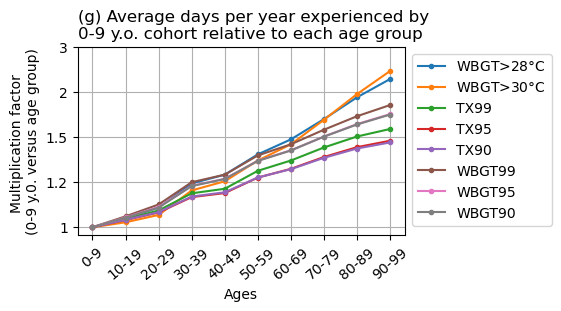

In [195]:

# set custom ticks
custom_ticks = [1/1,  1/1.2, 1/1.5, 1/2,  1/3,]
step_ages = 9
x_hot_days = [1,5,10,20,50]

fig, ax = plt.subplots(figsize=(5.5,3),layout='constrained',facecolor='none')
plt.gca().invert_yaxis()

da=da_nAHD_percapita_peopledays_10y_WBGT28_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='WBGT>28$\degree$C',marker='.')

da=da_nAHD_percapita_peopledays_10y_WBGT30_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='WBGT>30$\degree$C',marker='.')

da=da_nAHD_percapita_peopledays_10y_TX99_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='TX99',marker='.')

da=da_nAHD_percapita_peopledays_10y_TX95_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='TX95',marker='.')

da=da_nAHD_percapita_peopledays_10y_TX90_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='TX90',marker='.')

da=da_nAHD_percapita_peopledays_10y_WBGT99_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='WBGT99',marker='.')

da=da_nAHD_percapita_peopledays_10y_WBGT95_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='WBGT95',marker='.')

da=da_nAHD_percapita_peopledays_10y_WBGT90_models.sel(features='per_capita_days')
( da / da.sel(age_ranges=0)).mean(dim='model').to_pandas().plot(ax=ax,label='WBGT90',marker='.')



ax.set_title('(g) Average days per year experienced by \n0-9 y.o. cohort relative to each age group',loc='left')
# set custom yticks
ax.yaxis.set_major_formatter(formatter)
ax.set_yticks(custom_ticks)
ax.grid()
ax.set_xlabel(' ')
ax.set_xticks(ticks=np.arange(0,91,10), labels=[f'{x}-{x+step_ages}' for x in da.age_ranges.values],  rotation=40);
ax.set_ylabel('Multiplication factor \n(0-9 y.0. versus age group)')        
ax.set_xlabel('Ages')

plt.legend(bbox_to_anchor=(1, 1))

#plt.savefig(os.path.join(figdir,'slopes_models_dpy_flat.png'),dpi=300,bbox_inches='tight',transparent=False)